***About Dataset***

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) 
         (b) Date: March 4, 1999

Past Usage:

Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122.
Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83.
Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI.

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


**OBJECTIVE**

To analyse which features are important in determining survival of the cancer patient
Analysis will be done by using univariate and bivariate techniques.


***HIGH LEVEL STATISTICS OF DATASET***

In [0]:
haberman = pd.read_csv('/content/haberman.csv')

In [5]:
# number of data points and features
print(haberman.shape) 


(306, 4)


In [6]:
# column names in dataset
haberman.columns 

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [7]:
# dataset has 2 classes
# class 1: patient survived 5 years or longer
# class 2: patient died within 5 years
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

In [9]:
#dataset has no null values
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [0]:
#renaming of status of patient for better understanding
#1--> alive
#3--> dead
haberman['status'] = haberman['status'].map({1:"alive", 2:"dead"})

In [12]:
#more readable form achieved
haberman[:10]


,age,year,nodes,status
0,30,64,1,alive
1,30,62,3,alive
2,30,65,0,alive
3,31,59,2,alive
4,31,65,4,alive
5,33,58,10,alive
6,33,60,0,alive
7,34,59,0,dead
8,34,66,9,dead
9,34,58,30,alive


***Univariate Analysis***

***1) PDF***

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


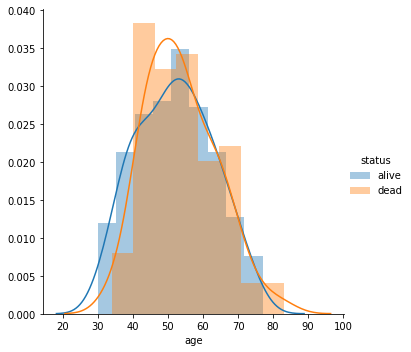

In [13]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

*Observation:*
* There has been huge overlapping of both plots
* In age group 43-53, comparatively more patients died
*In age group 30-43, more patients survived

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


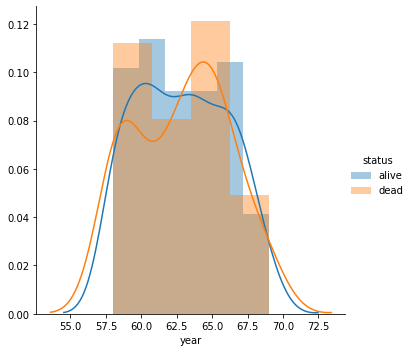

In [18]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

*Observations:*

*In year 1964-1966, more number of operated people died as compared to those who survived

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


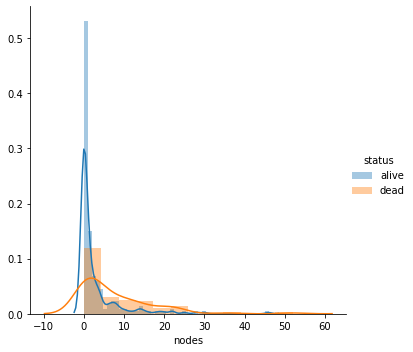

In [17]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

*Observations:*

* People having less than 3 axillary nodes had more chances of survival.
* No patient had more than 26 axii nodes.

***2) CDF***

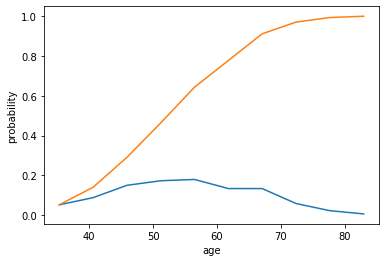

In [20]:
counts, bin_edges = np.histogram(haberman['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.ylabel("probability")
plt.xlabel('age')
plt.show();

***Observations:***

* 50% of patients were under age 54.
* 10% of patients were above age 70.

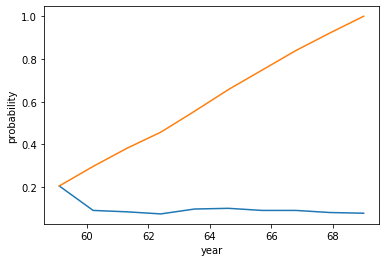

In [21]:
counts, bin_edges = np.histogram(haberman['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.ylabel("probability")
plt.xlabel('year')
plt.show();

*Observations:*

* Number of operations performed gradually decreased till 1963 and then slightly increased.
* Till 1963, roughly 45% of operations were performed.


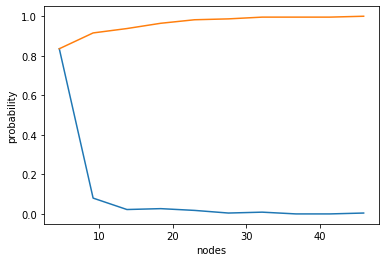

In [31]:
counts, bin_edges = np.histogram(haberman[haberman['status']=='alive']['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.ylabel("probability")
plt.xlabel('nodes')
plt.show();

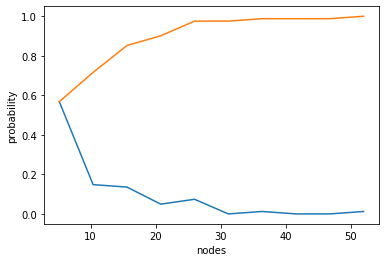

In [32]:
counts, bin_edges = np.histogram(haberman[haberman['status']=='dead']['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.ylabel("probability")
plt.xlabel('nodes')
plt.show();

*Observations:*

* Approximately 82% of survived patients had less than 4 axillary nodes.
* 30% of patients who died had more than 12 axillary nodes.
* Having Less than 4 axillary nodes corresponds to more chances of survival as compared to chances of death.
* However there are less chances of survival if number of nodes is greater than 12. As just 5% patients survived who had more than 12 nodes.



***3) Box Plot***

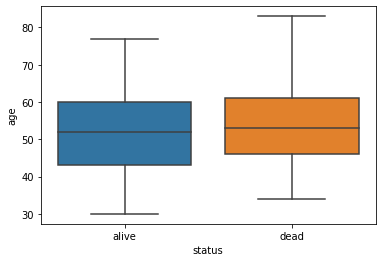

In [33]:
sns.boxplot(x='status',y='age', data=haberman)
plt.show()

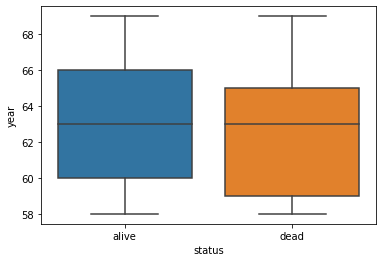

In [34]:
sns.boxplot(x='status',y='year', data=haberman)
plt.show()

*Observations:*

* Before 1959, 25% of people operated died.

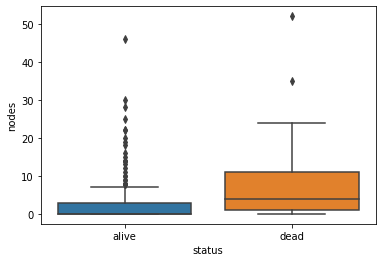

In [35]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

*Observations:*

* 75% survived patients had upto 4 nodes.
* 75% patients who died had upto 11 nodes.

In [0]:
sns.violinplot(x="status", y="age", data=iris, size=8)
plt.show()

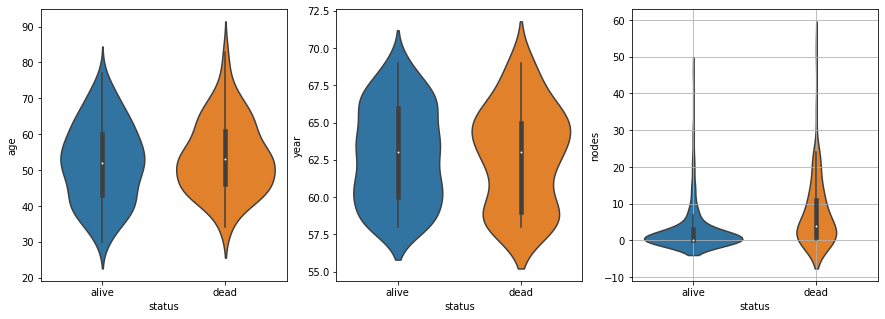

In [37]:
plt.figure(figsize=(15,5))
i=1
for f in (list(haberman.columns)[:-1]):  
    plt.subplot(1,3,i); i+=1 
    sns.violinplot(x= 'status',y= f,data=haberman)
plt.grid()
plt.show()

*Observations:*

* Survival chances are more when age < 40.
* More patients died as compared to survived ones in age group 43-53.
* For nodes upto 5, high chances of survival.

***Bivariate Analysis***

**1) Scatter plots**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


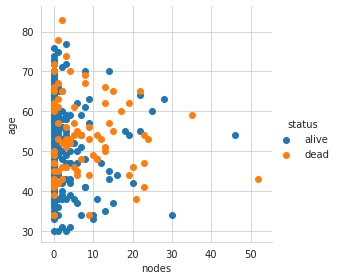

In [38]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "nodes", "age") \
   .add_legend();
plt.show();

*Observations:*

* status label(a person died or survived) is not linearly seprable
* people having 0-5 axillary node survived and died as well but survival ratio is greater than the death ratio.

***2) Pair Plots***

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


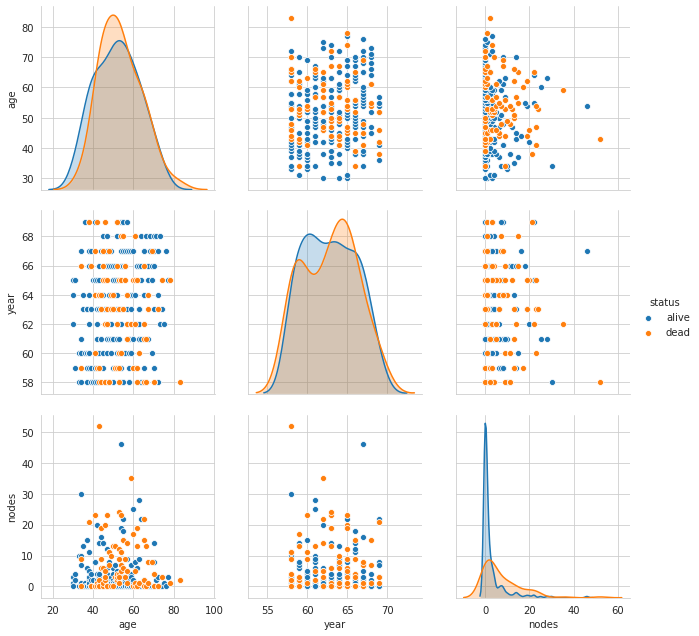

In [40]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", size=3);
plt.show()

*Observations:*

* Lot of overlapping between datapoints
* Axillary node can be used as a parameter for making classifier.
* No classification possible using simple linear models

***Conclusion***

* Axillary node is an important criteria for predicting survival chances.
* 82% of survived patients had less than 4 axillary nodes.
* In age group 43-53, comparatively more patients died.
* 30% of patients who died had more than 12 axillary nodes.
* Not linear separable data ponts.